# Plot the output of count_events.py

In [2]:
#import python packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import oskar

### Import data

In [3]:
rid = '20160507_145210'
h5 = oskar.H5Data(rid)              # data
h5.load_log()
h5.pprint()
logDF = h5.log
vDF = h5.var_df()
uDF = h5.unique_df()
out_dire = h5.out_dire("Events")    # output
# count data
channels = ['CH_A0']
eventDF = h5.load_count(channels, include_vars=True)

20160507_145210
   Author:	 AA
   Description:  n = 10 high res lineshape


In [4]:
uDF.head()

,DLY_EA,DLY_GA,IR,VOL_u100,VOL_u101
VID,,,,,
1,6.470000e-07,0.000001,756.20,2000,1600
2,6.470000e-07,0.000001,756.21,2000,1600
3,6.470000e-07,0.000001,757.50,2000,1600
4,6.470000e-07,0.000001,757.53,2000,1600
5,6.470000e-07,0.000001,757.56,2000,1600


In [5]:
eventDF.head()

trigger         width       amp  squid  rep        DLY_EA  \
FTYPE EVENT                                                                   
CH_A0 0      5.460000e-07  3.395000e-07  0.060920      1    1  6.470000e-07   
      1      8.925000e-07  4.200000e-08  0.009853      1    1  6.470000e-07   
      2      1.022000e-06  2.310000e-07  0.035527      1    1  6.470000e-07   
      3      1.274000e-06  7.700000e-08  0.017687      1    1  6.470000e-07   
      4      1.484000e-06  2.450000e-08  0.006719      1    1  6.470000e-07   

               DLY_GA      IR  VOL_u100  VOL_u101  
FTYPE EVENT                                        
CH_A0 0      0.000001  759.51      2000      1600  
      1      0.000001  759.51      2000      1600  
      2      0.000001  759.51      2000      1600  
      3      0.000001  759.51      2000      1600  
      4      0.000001  759.51      2000      1600

In [6]:
eventDF.describe()

,trigger,width,amp,squid,rep,DLY_EA,DLY_GA,IR,VOL_u100,VOL_u101
count,7.389970e+05,7.389970e+05,738997.000000,738997.000000,738997.000000,7.389970e+05,7.389970e+05,738997.000000,738997.0,738997.0
mean,1.647796e-06,1.294072e-07,0.023524,684.285912,50.389742,6.470000e-07,1.100000e-06,758.693936,2000.0,1600.0
std,1.077548e-06,1.535321e-07,0.018538,388.981059,28.831698,8.490135e-18,1.574614e-17,0.821775,0.0,0.0
min,0.000000e+00,2.100000e-08,0.004365,1.000000,1.000000,6.470000e-07,1.100000e-06,756.200000,2000.0,1600.0
25%,9.800000e-07,3.850000e-08,0.010859,349.000000,25.000000,6.470000e-07,1.100000e-06,758.070000,2000.0,1600.0
50%,1.361500e-06,6.300000e-08,0.016734,691.000000,50.000000,6.470000e-07,1.100000e-06,758.730000,2000.0,1600.0
75%,2.040500e-06,1.050000e-07,0.024041,1021.000000,75.000000,6.470000e-07,1.100000e-06,759.390000,2000.0,1600.0
max,5.974500e-06,9.450000e-07,0.070405,1350.000000,104.000000,6.470000e-07,1.100000e-06,760.020000,2000.0,1600.0


## Estimate positron implanation time

In [7]:
# check the event spectra to ensure this makes sense
t0 = (eventDF[eventDF.amp > 0.07].trigger).mean()
print('t0 = %.2f us'%(t0*1e6))

t0 = 0.55 us


## Total triggers

In [10]:
total = []
acquisition = []
for vid in uDF.index:
    # select data
    data = eventDF[(eventDF[uDF.columns] == uDF.loc[vid]).all(1)]
    acq_on = logDF.loc[np.unique(data.squid.values), 'ACQUIRE'].sum()
    acquisition.append(acq_on)
    trigs = (data['trigger'].values)*1e6
    total.append((trigs > 2.5).sum())
acquisition = np.array(acquisition)
total = np.array(total)

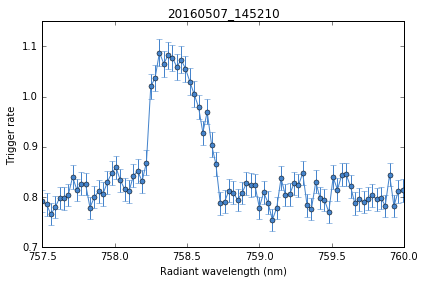

In [11]:
#plot setup
fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(uDF.IR, total/acquisition, yerr=np.sqrt(total)/acquisition,
           marker='o', ms=5, color=oskar.colors[0])
ax.set_xlim(757.5, 760)

# labels
ax.set_title(rid)
ax.set_xlabel('Radiant wavelength (nm)')
ax.set_ylabel('Trigger rate')
# save data
plt.tight_layout();
fileout = os.path.join(out_dire, 'total.png')
plt.savefig(fileout, dpi=150)
plt.show()